In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
cd /content/drive/MyDrive/Colab Notebooks/Carpov/Data_set

/content/drive/MyDrive/Colab Notebooks/Carpov/Data_set


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (8, 5)

import warnings
warnings.filterwarnings('ignore')

# Boostings

Данные с которыми вы будете работать представляют из себя характеристики клиента страховой компании по которым нужно понять будет ли он заинтересован в страховке. Таким образом, страховая компания может более оптимально таргетить рекламу и выстраивать коммуникацию с клиентами, повышая конверсию.

**Описания колонок:**
- Gender - Male, Female
- Age - Возраст
- Driving_License - Наличие водительского удостоверения
- Region_Code - Область проживания
- Previously_Insured - Пользовался ли раньше услугами страховой компании
- Vehicle_Age - Возраст транспортного средства
- Vehicle_Damage - Попадало ли траспортное средство в ДТП
- Annual_Premium - Ежегодные выплаты клиента
- Policy_Sales_Channel - Политика распространения страховых услуг (через посредников, напрямую и т.д.)
- Vintage - Количество дней, в течение которых клиент был связан с компанией


- **Response** - заинтересован в страховке 1, не откликнулся 0

In [5]:
pwd

'/content/drive/MyDrive/Colab Notebooks/Carpov/Разбор'

In [8]:
data = pd.read_csv('vehicle_insurance.csv')

data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,Female,24,1,37.0,1,< 1 Year,No,21243.0,152.0,21,0
9996,Male,28,1,35.0,1,< 1 Year,No,23589.0,160.0,173,0
9997,Female,27,1,15.0,0,< 1 Year,Yes,33340.0,152.0,207,0
9998,Female,28,1,14.0,1,< 1 Year,No,25426.0,152.0,247,0


**Задание 0.** Проведите небольшой EDA. Посмотрите на распределения некоторых колонок, на матрицу корреляций. Также проверьте баланс классов и посмотрите на распределение возраста транспортного средства в зависимости от response. \
Закодируйте признаки типа `object` с помощью `one-hot` кодирования.

P.S. некоторые не `object`колонки по смыслу очевидно являются категориальными. Так как мы будем строить ансамбли на основе деревьев, их можно оставить в первоначальном виде.

In [11]:
data.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.812900,0.997800,26.425400,0.443800,30609.649700,112.414400,155.560300,0.124700
std,15.514785,0.046855,13.153552,0.496856,16562.392967,53.975042,83.923849,0.330395
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24458.250000,30.000000,83.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31746.000000,136.000000,156.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39572.250000,152.000000,228.000000,0.000000
max,84.000000,1.000000,52.000000,1.000000,267698.000000,163.000000,299.000000,1.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                10000 non-null  object 
 1   Age                   10000 non-null  int64  
 2   Driving_License       10000 non-null  int64  
 3   Region_Code           10000 non-null  float64
 4   Previously_Insured    10000 non-null  int64  
 5   Vehicle_Age           10000 non-null  object 
 6   Vehicle_Damage        10000 non-null  object 
 7   Annual_Premium        10000 non-null  float64
 8   Policy_Sales_Channel  10000 non-null  float64
 9   Vintage               10000 non-null  int64  
 10  Response              10000 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 859.5+ KB


<Axes: xlabel='Policy_Sales_Channel', ylabel='Density'>

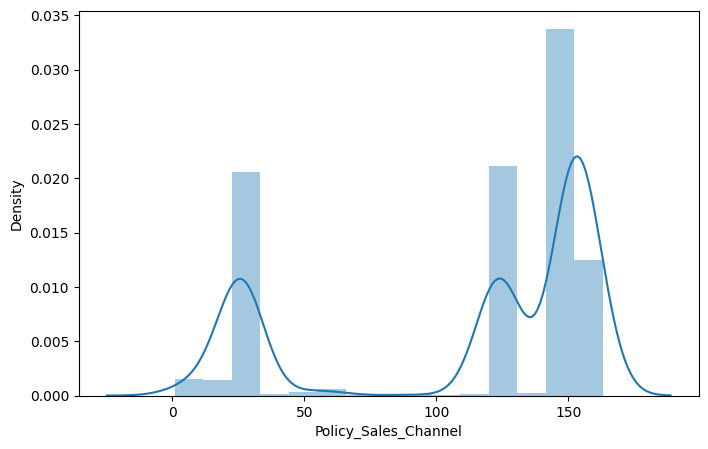

In [9]:
### Your code is here
sns.distplot(data['Policy_Sales_Channel'])



<Axes: >

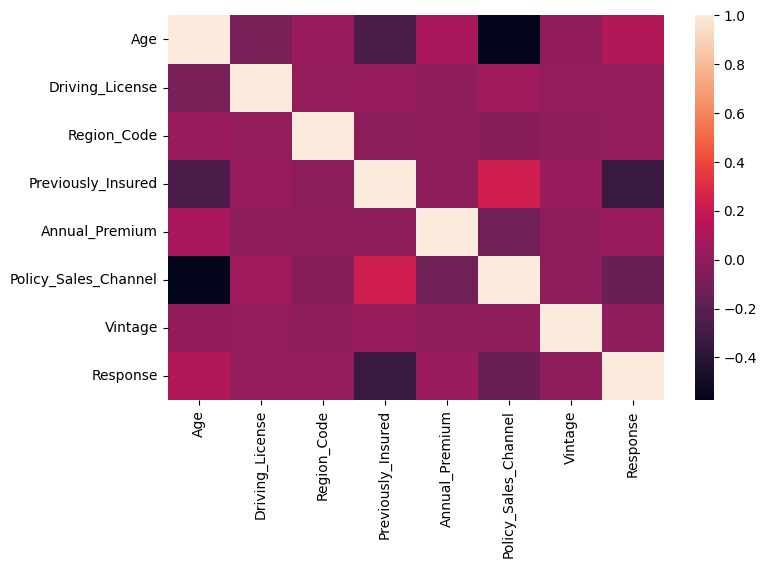

In [18]:
sns.heatmap(data[list(data.select_dtypes(exclude = object).columns)].corr())

<Axes: xlabel='Vehicle_Age', ylabel='count'>

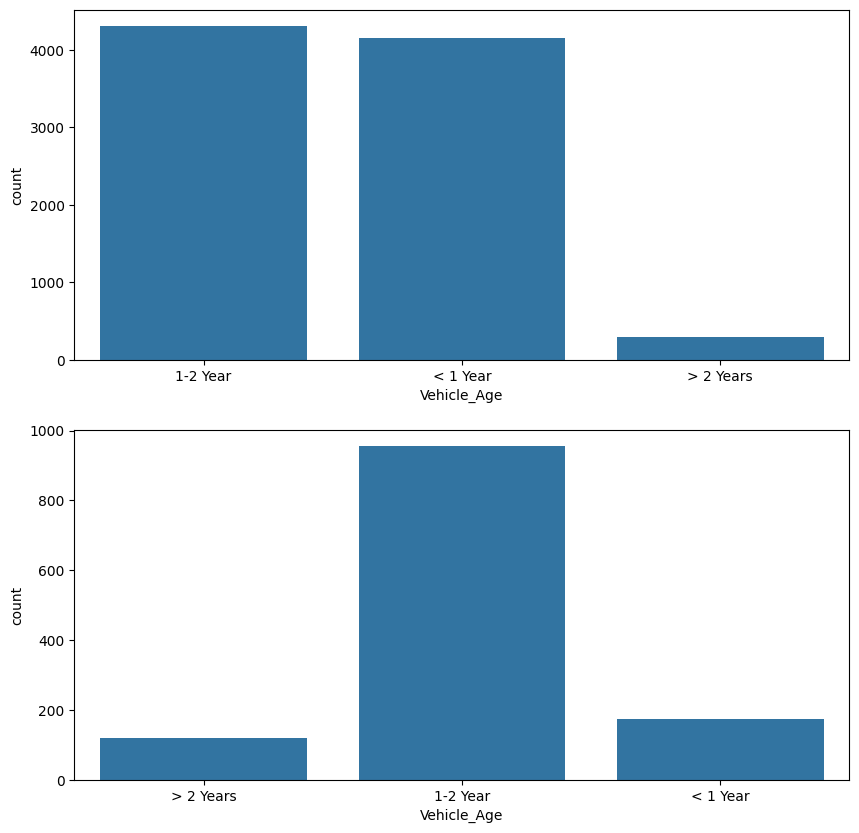

In [25]:
fig, axes = plt.subplots(2,1, sharex=False, figsize = (10,10))

sns.countplot(data = data[data['Response'] == 0], x = 'Vehicle_Age', ax = axes[0])
sns.countplot(data = data[data['Response'] == 1], x = 'Vehicle_Age', ax = axes[1])


In [27]:
data['Response'].value_counts()

,count
Response,
0,8753
1,1247


In [28]:
data_cp = data.copy()

In [29]:
data = pd.get_dummies(data, drop_first=True)

**Задание 1.** Обучите градиентный бустинг из sklearn на данных и замерьте accuracy и f1-score на тестовой выборке. В качестве параметров ансамбля установите `learning_rate = 1`, `random_state = 1`, `n_estimators = 100`. Изобразите ROC-кривую и посчитайте AUC, оцените качество классификации. (2б)

P.S. для всех прочих моделей в этом домашнем задании тоже фиксируйте `random_state = 1`. Как думаете, что может быть случайного в процедуре обучения градиентного бустинга?

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, roc_curve, auc

X = data.drop('Response', axis=1)
y = data['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    shuffle=True,
                                                    test_size=0.2)

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

### Your code is here

model = GradientBoostingClassifier(learning_rate = 1,
                                   random_state= 1,
                                   n_estimators = 100)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1770
           1       0.31      0.24      0.27       230

    accuracy                           0.85      2000
   macro avg       0.61      0.59      0.59      2000
weighted avg       0.84      0.85      0.84      2000



In [38]:
y_preds_proba = model.predict_proba(X_test)[:,1]

In [39]:
y_preds_proba

array([1.51732090e-03, 4.13470876e-01, 1.27105663e-04, ...,
       3.05178623e-01, 4.52218292e-01, 5.75114509e-04])

Integral AUC: 0.8282399901744043


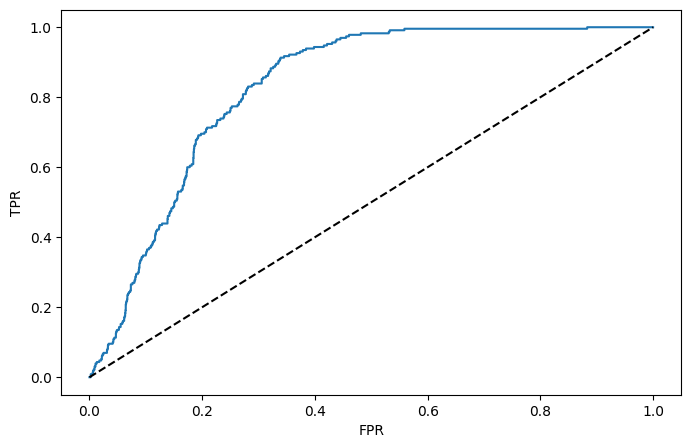

In [40]:
fpr, tpr, _ = roc_curve(y_test, y_preds_proba)
plt.xlabel("FPR")
plt.ylabel("TPR")

plt.plot(fpr, tpr)
plt.plot((0,1), ls = 'dashed', color = 'black')
print("Integral AUC:" , auc(fpr, tpr))


**Задание 2.** Переберите параметры `n_estimators` и `learning_rate` по двумерной сетке. При обучении в цикле сразу считайте f1-score на тестовой выборке и сохраняйте результат в матрицу. Для какого алгоритма качество окажется максимальным?

Постройте кривые для метрики f1-score в зависимости от числа шагов для нескольких learning_rate. Изобразите heatmap полученной матрицы. Сделайте вывод, как количество шагов влияет на качество совместно с различной скоростью обучения? (2б)

P.S. для подсчета f1-score передайте в функцию параметр `average='weighted'`, чтобы учитывался еще и баланс классов (вспомните микро/макро-усреднения).

In [41]:
### Задаем сетку параметров

n_estimators_list = [5, 10, 20, 50, 100, 200, 700, 1000]
learning_rate_list = [1, 0.1, 0.01]

In [43]:
### Your code is here
f1_matrix = np.zeros((len(n_estimators_list), len(learning_rate_list)))


for (i,n) in enumerate(n_estimators_list):
  for (j, lr) in enumerate(learning_rate_list):
    model = GradientBoostingClassifier(n_estimators = n,
                                       learning_rate = lr,
                                       max_depth = 5,
                                       random_state = 1)
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)

    f1_matrix[i][j] = f1_score(y_test, y_preds, average = 'weighted')
print(f1_matrix)


f1_df = pd.DataFrame(f1_matrix,
                     index = map(str, n_estimators_list),
                     columns = map(str, learning_rate_list))



[[0.83598325 0.83197068 0.83100796]
 [0.83840034 0.83197068 0.83100796]
 [0.84418229 0.83171715 0.83100796]
 [0.83603288 0.83162689 0.83222411]
 [0.83748981 0.83772792 0.83197068]
 [0.842608   0.84312432 0.83171715]
 [0.84401864 0.84268016 0.8348982 ]
 [0.84644748 0.8460635  0.83711097]]


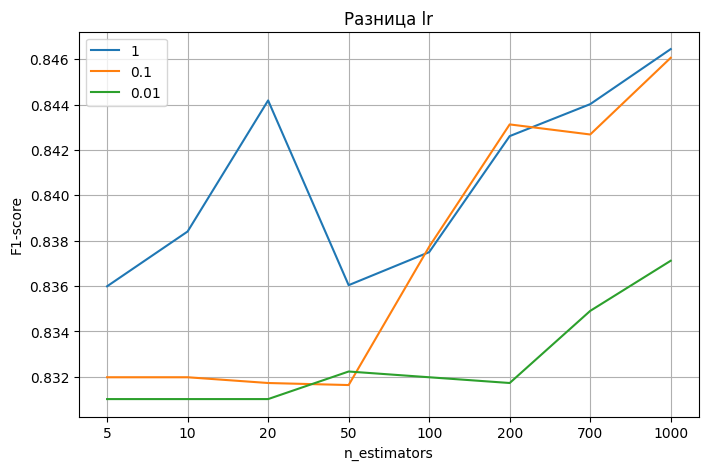

In [45]:
plt.plot(f1_df)
plt.title("Разница lr")
plt.xlabel("n_estimators")
plt.ylabel("F1-score")

plt.grid()
plt.legend(learning_rate_list)


<Axes: >

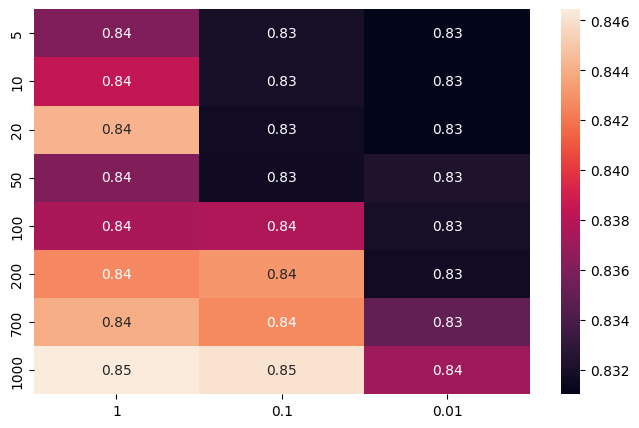

In [46]:
sns.heatmap(f1_df, annot = True)

Чем больше, тем лучше качество, однако слишком большой увеличение данного параметра может привести к ухудшению производительности и переобучению.

In [50]:
print(f1_matrix.max())

0.8464474778638382


**Задание 3.** Вам потребуется обучить 4 модели и посчитать метрику f1-score на тестовой и обучающей выборках для каждой модели.
1. Случайный лес с максимальной глубиной деревьев 5,
2. Случайный лес с максимальной глубиной деревьев 5000,
3. Градиентный бустинг с максимальной глубиной деревьев 5,
4. Градиентный бустинг с максимальной глубиной деревьев 5000.

Для каждой модели перебирайте значения `n_estimators`, как в предыдущем задании. Отрисуйте графики зависимости f1-score от количества шагов, используя `average='weighted'` для учёта баланса классов.

Если в качестве базовой модели брать неглубокие деревья, то какая модель лучше запоминает обучающую выборку: случайный лес или градиентный бустинг? Какая из них лучше предсказывает на тестовой выборке? Как изменятся ответы, если базовая модель - это глубокое решающее дерево?

Случайный лес - глубокие деревья, потому что у них низкий bias(смещение). Градиентный бустинг  - неглубокие деревья, потому что нужен низкий variance(разброс)

Подвержен ли переобучению случайный лес и градиентный бустинг? Как это отражается на графиках? (4б)

Случайный лес - нет. Градиентный бустинг - конечно.

In [53]:
from sklearn.ensemble import RandomForestClassifier

n_estimators_list = [2, 3, 4, 5, 10, 20, 50, 70, 100, 200, 700, 1000, 2000]

### Your code is here
f1_matrix = np.zeros((len(n_estimators_list), 8))

for (j, max_depth) in enumerate([5,5000]):
  for (i, n) in enumerate(n_estimators_list):

    rf = RandomForestClassifier(n_estimators= n,
                                max_depth = max_depth,
                                random_state = 1)
    rf.fit(X_train, y_train)

    rf_preds_test = rf.predict(X_test)
    rf_preds_train = rf.predict(X_train)

    gb = GradientBoostingClassifier(n_estimators= n,
                                    max_depth = max_depth,
                                    random_state = 1)
    gb.fit(X_train, y_train)
    gb_preds_test = gb.predict(X_test)
    gb_preds_train = gb.predict(X_train)

    f1_matrix[i, j*4:j*4+4] = (f1_score(y_test, rf_preds_test, average = "weighted"),
                               f1_score(y_train, rf_preds_train, average = "weighted"),
                               f1_score(y_test, gb_preds_test, average = "weighted"),
                               f1_score(y_train, gb_preds_train, average = "weighted"))
trees = list(map(str, n_estimators_list))

Text(0.5, 1.0, 'Gradient_Boosting, max_depth = 5000')

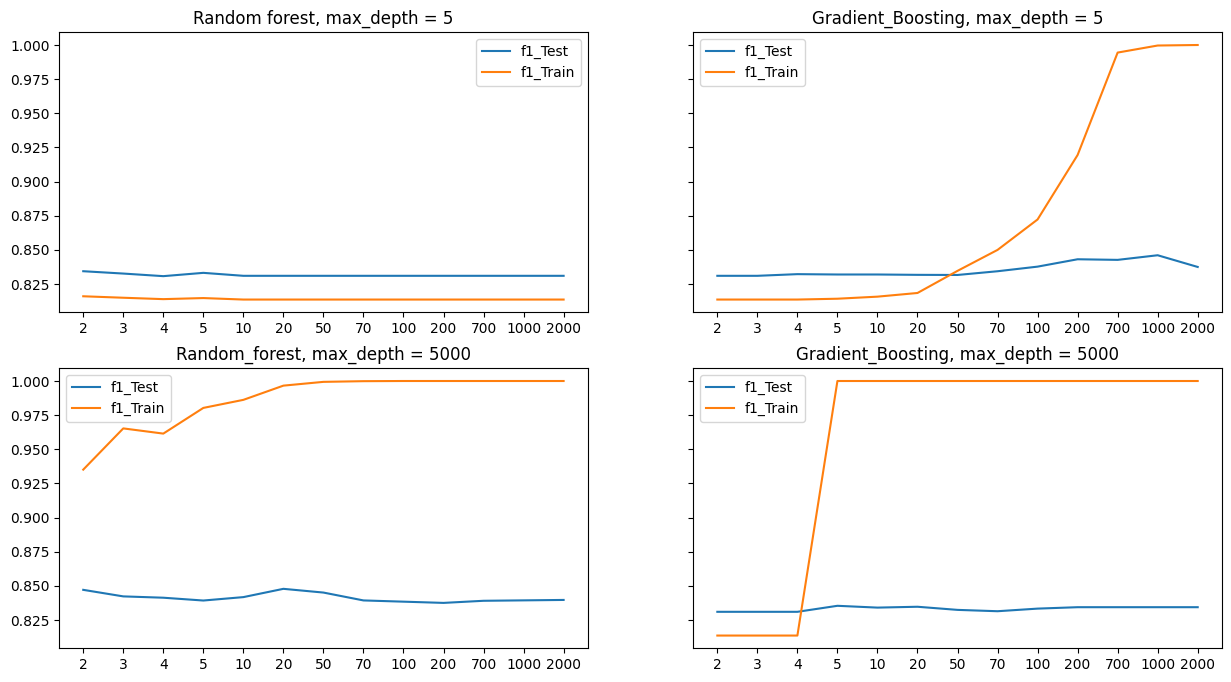

In [56]:
f1g, axs = plt.subplots(2,2, figsize = (15,8), sharey = True)

for (i, ax) in enumerate(axs.reshape(-1)):
  ax.plot(trees, f1_matrix[:, i*2], label = 'f1_Test')
  ax.plot(trees, f1_matrix[:, i*2+1], label = 'f1_Train')
  ax.legend()

axs[0,0].set_title("Random forest, max_depth = 5")
axs[1,0].set_title("Random_forest, max_depth = 5000")
axs[0,1].set_title("Gradient_Boosting, max_depth = 5")
axs[1,1].set_title("Gradient_Boosting, max_depth = 5000")

**Задание 4.** Установите библиотеку `catboost`. Главной особенностью catboost явялется наличие встроенной обработки категориальных признаков. Для каждого категориального столбца вычисляется следующее значение
$$
avg\_target = \dfrac{countInClass + prior}{totalCount + 1},
$$
* countInClass - количество объектов положительного класса для данной категории **до текущего объекта**,
* prior - некоторая константа для числителя, обычно равна доле положительного класса в таргете,
* totalCount - количество наблюдаемых категорий вплоть **до текущего** с той же категорией, что и у текущего.

Так как первые такие значения будут иметь больший разброс, чем последние, то выборку перемешивают несколько раз и полученные статистики усредняют.
В отличие от target encoder подсчитанные значения зависят от наблюдаемой истории, т.е. вычисляются только из наблюдений до них, таким образом не происходит target leakage.

Почитать подробнее можно здесь: [Transforming categorical features](https://catboost.ai/en/docs/concepts/algorithm-main-stages_cat-to-numberic)

Обучите CatBoostClassifier с дефолтными параметрами. Используйте датасет до  (разбейте на train/test по старой логике с тем же random state'ом). Категориальные колонки передайте в параметр `cat_features` метода `fit`. Catboost сам с ними разберется.

Сравните качество с моделью из предыдущего задания. Стало ли лучше?

Сравните feature importances в модели из задания 2 и в catboost с помощью соответствующих методов, изобразите их, используя `barplot`. \
Какие признаки стали более важными с новым методом кодирования? (4б)

In [57]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.9 MB/s eta 0:00:00


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    10000 non-null  int64  
 1   Driving_License        10000 non-null  int64  
 2   Region_Code            10000 non-null  float64
 3   Previously_Insured     10000 non-null  int64  
 4   Annual_Premium         10000 non-null  float64
 5   Policy_Sales_Channel   10000 non-null  float64
 6   Vintage                10000 non-null  int64  
 7   Response               10000 non-null  int64  
 8   Gender_Male            10000 non-null  bool   
 9   Vehicle_Age_< 1 Year   10000 non-null  bool   
 10  Vehicle_Age_> 2 Years  10000 non-null  bool   
 11  Vehicle_Damage_Yes     10000 non-null  bool   
dtypes: bool(4), float64(3), int64(5)
memory usage: 664.2 KB


In [77]:
from catboost import CatBoostClassifier

### Your code is here

X = data_cp.drop('Response', axis = 1)
y = data_cp['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=True, test_size = 0.2)

catb = CatBoostClassifier(verbose = 0)

catb.fit(X_train,
         y_train,
         cat_features = list(X.select_dtypes(include = object).columns))
y_pred = catb.predict(X_test)


In [80]:
print(classification_report(y_test, y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.8891    0.9870    0.9355      1770
           1     0.3429    0.0522    0.0906       230

    accuracy                         0.8795      2000
   macro avg     0.6160    0.5196    0.5130      2000
weighted avg     0.8262    0.8795    0.8383      2000



Text(0.5, 1.0, 'GBC f_imp')

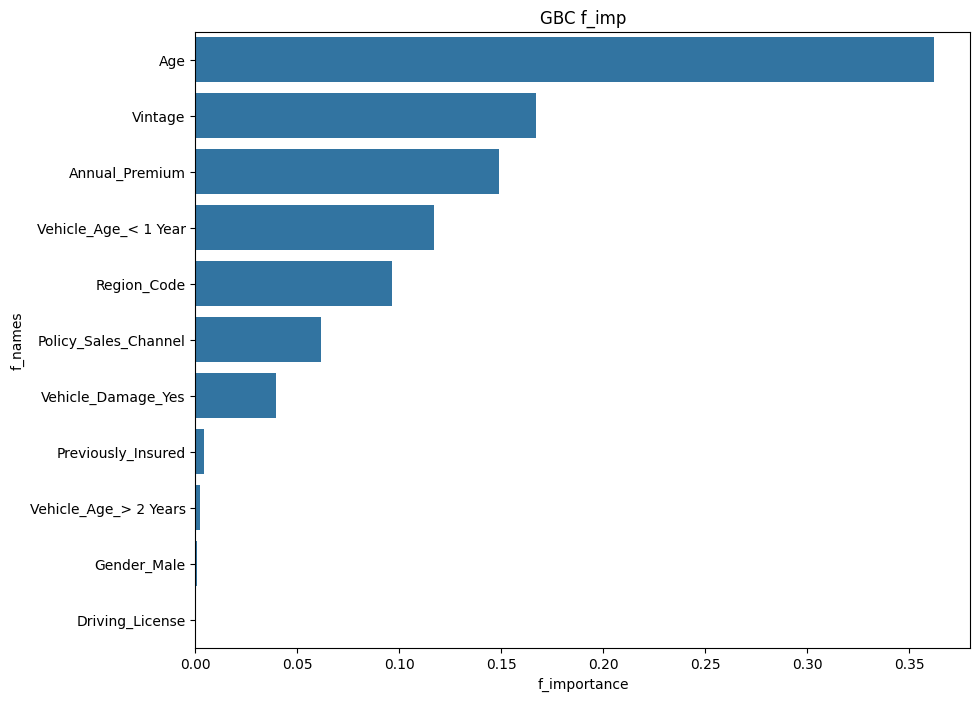

In [73]:
importance_df = pd.DataFrame({'f_names': data.columns.drop('Response'),
                             'f_importance': model.feature_importances_})

plt.figure(figsize = (10,8))
sns.barplot(x = 'f_importance', y = 'f_names',
            data = importance_df.sort_values('f_importance', ascending = False))
plt.title("GBC f_imp")

Text(0.5, 1.0, 'GBC f_imp')

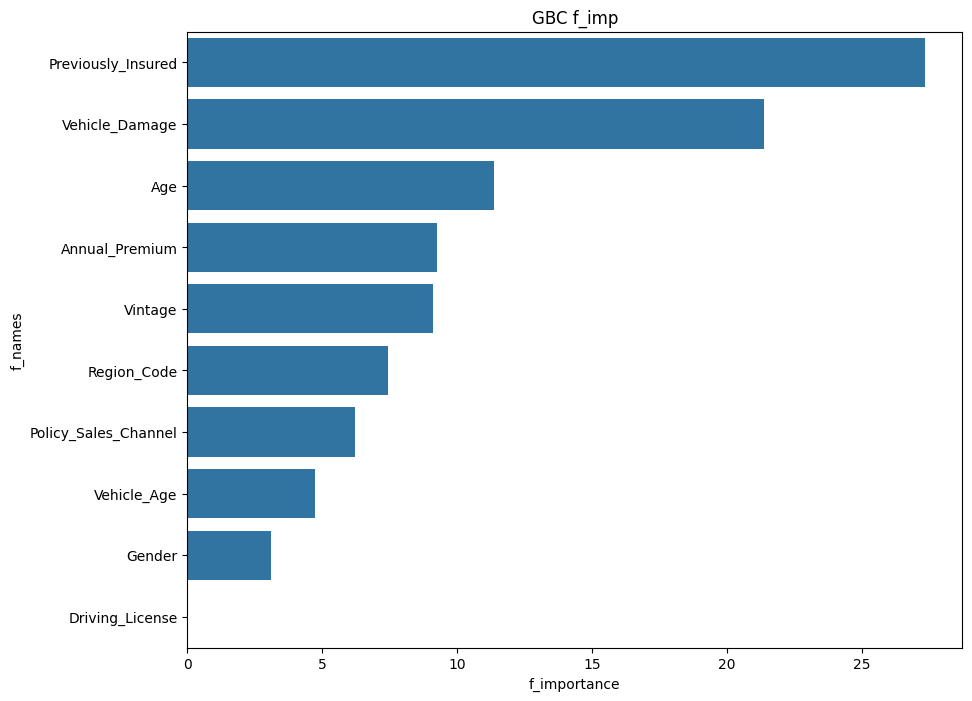

In [74]:
importance_df = pd.DataFrame({'f_names': X.columns,
                             'f_importance': catb.feature_importances_})

plt.figure(figsize = (10,8))
sns.barplot(x = 'f_importance', y = 'f_names',
            data = importance_df.sort_values('f_importance', ascending = False))
plt.title("GBC f_imp")

**Задание 5.** Установите библиотеку `lightgbm`. На сегодняшний день это наиболее быстрый метод градиентного бустинга, при этом расходующий небольшое количество оперативной памяти. Достигает он этого за счет построения деревьев вглубь по листьям (leaf-wise), а не по уровням (level-wise), как другие методы, например XGBoost.
Более понятно это на картинке:

![%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5.png](attachment:%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5.png)

![%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5-2.png](attachment:%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5-2.png)

В то время, как XGBoost за раз разделяет вершины на целом уровне той же глубины, LightGBM разделяет одну вершину за раз. Отсюда прирост в скорости.

Обучите `LGBMClassifier` на изначальных(закодированных) данных и добейтесь максимального качества на тестовой выборке, перебрав параметры глубины деревьев, количества шагов, скорости обучения и т.д.

In [79]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [100, 500, 1000, 2000],
          'max_depth': [2, 3, 5, 100],
          'learning_rate': [0.1, 0.01, 0.001]}

### Your code is here

X = data.drop('Response', axis = 1)
y = data['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, shuffle = True, test_size = 0.2)




In [82]:
grid = GridSearchCV(LGBMClassifier(verbose_eval = -1), params)
grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred, digits = 4))
grid.best_estimator_

Выходные данные были обрезаны до нескольких последних строк (5000).
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

LGBMClassifier(learning_rate=0.01, max_depth=2, verbose_eval=-1)

In [83]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8850    1.0000    0.9390      1770
           1     0.0000    0.0000    0.0000       230

    accuracy                         0.8850      2000
   macro avg     0.4425    0.5000    0.4695      2000
weighted avg     0.7832    0.8850    0.8310      2000



In [84]:
grid.best_estimator_

LGBMClassifier(learning_rate=0.01, max_depth=2, verbose_eval=-1)